In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:\github_2011_2021(0_1).csv", low_memory=False, encoding='cp949')

In [46]:
df.head()

,Num,User_ID,User_Name,Repository_Name,created_at,updated_at,pushed_at,CSS,JavaScript,CoffeeScript,...,Charity,RUNOFF,Click,Pep8,GAMS,Grace,Curry,Janet,Pan,ATS
0,5092,50314,atombender,cadvisor,2016-07-21T04:18:31Z,2016-07-21T04:18:32Z,2016-07-22T00:04:24Z,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5091,100451,mjrusso,joy-of-clojure-examples,2011-11-10T03:39:00Z,2018-11-13T21:06:24Z,2012-05-06T03:51:45Z,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5090,100451,mjrusso,dotfiles,2011-11-05T16:20:04Z,2022-04-12T02:52:05Z,2022-04-20T18:26:08Z,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5089,50314,atombender,bundler-audit,2013-03-01T23:56:25Z,2013-05-24T20:04:18Z,2013-03-02T00:06:03Z,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5088,100451,mjrusso,better-together,2011-09-22T12:47:56Z,2014-04-27T10:10:53Z,2011-10-18T21:18:12Z,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df['date'] = df['created_at']
df['year'] = df['created_at']
df['date'] = df.created_at.str[0:10] # 날짜 부분 추출
df['year'] = df.created_at.str[0:4]

df['date'] = pd.to_datetime(df.date)
dt = df.sort_values(by='date')

df.year


0         2016
1         2011
2         2011
3         2013
4         2011
          ... 
250068    2020
250069    2019
250070    2013
250071    2014
250072    2021
Name: year, Length: 250073, dtype: object

In [48]:
dt = dt.drop(['created_at'], axis=1)
dt = dt.drop(['updated_at'], axis=1)
dt = dt.drop(['pushed_at'], axis=1)

dt = dt.drop(['Makefile'], axis=1)

dt.head

<bound method NDFrame.head of            Num  User_ID    User_Name Repository_Name  CSS  JavaScript  \
142522  142555     4573   joshfrench         liquify    0           0   
38161    38194   103576        molte              io    0           0   
187176  187209     6295       jsuchy              go    0           0   
117739  117772   110766      typeish      pigeonfarm    0           1   
67776    67809   106559    heinemann   Konsolenradio    0           0   
...        ...      ...          ...             ...  ...         ...   
1864      1886   100118         leod         crevice    0           0   
137004  137037     4395       matsuu         co2mini    0           0   
238128  238161   119445      jftsang           geoip    0           0   
187687  187720   116815  Gendron5000            sm64    0           1   
194608  194641     6550         phss  advent-of-code    0           0   

        CoffeeScript  Shell  Ruby  Perl  ...  Click  Pep8  GAMS  Grace  Curry  \
142522      

In [49]:
value = dt.sum()
value = value.drop("year")
value = value.drop("User_ID")
value = value.drop("User_Name")
value = value.drop("Num")
sort_val = value.sort_values(ascending = False)

List_Lang = sort_val.index
List_Lang = List_Lang.to_list()

C:\Users\admin\AppData\Local\Temp\ipykernel_3036\2256442802.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  value = dt.sum()


In [50]:
def list_Chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

list_Chunked = list_Chunk(List_Lang, 10)

In [51]:
list_Chunked
List_top10 = list_Chunked[0]
List_top10

dt[List_top10]

,JavaScript,Shell,HTML,Ruby,CSS,Python,C,Java,C++,PHP
142522,0,0,0,1,0,0,0,0,0,0
38161,0,0,0,0,0,0,1,0,0,0
187176,0,0,0,1,0,0,0,0,0,0
117739,1,0,0,0,0,1,0,0,0,0
67776,0,1,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1864,0,0,0,0,0,0,0,0,0,0
137004,0,0,0,0,0,0,0,0,0,0
238128,0,0,1,0,0,1,0,0,0,0
187687,1,1,0,0,0,1,1,0,1,0


In [52]:
from re import T


grouped = dt[List_top10].groupby(dt['year']).sum()

def ratio():  #비율 계산
    for i in range(0, 11):
        Total = 0
        for j in range(0, 10):
            Total += grouped.iloc[i][j]
        
        for j in range(0, 10):
            grouped.iloc[i][j] = int(round(grouped.iloc[i][j]/Total * 100,2))
ratio()

grouped

,JavaScript,Shell,HTML,Ruby,CSS,Python,C,Java,C++,PHP
year,,,,,,,,,,
2011,22,12,2,27,2,11,6,5,3,5
2012,24,13,2,24,4,11,5,5,3,4
2013,23,13,3,21,11,9,4,4,3,4
2014,21,14,4,16,17,9,4,4,3,4
2015,19,13,17,11,14,8,4,4,3,3
2016,19,14,18,10,13,9,3,4,3,3
2017,19,15,17,8,12,10,4,4,3,3
2018,19,16,17,8,12,10,4,4,3,3
2019,18,16,17,7,12,11,4,4,4,2


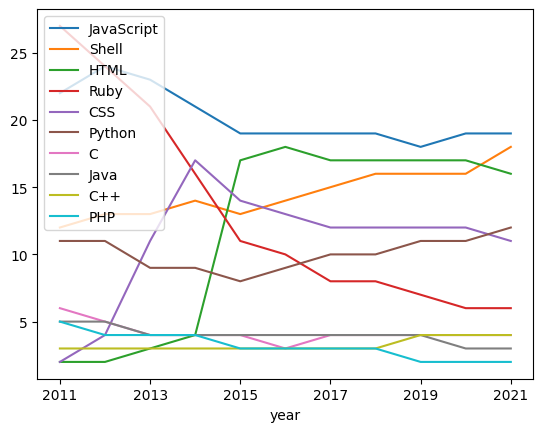

In [53]:
ax = grouped.plot(kind='line')